In [1]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.feature_selection import SelectKBest, f_regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, scorer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import metrics

In [2]:
from sklearn.model_selection import KFold

In [3]:
df = pd.read_csv("/Users/shuol/Desktop/kc_house_data.csv",sep=",")
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [4]:
pandas_profiling.ProfileReport(df)

In [5]:
df[df["yr_renovated"]==0].yr_renovated.count()
# because the renovate year attributes included many o value (missing), we will not to use the attributes.

20699

In [6]:
df[df["view"]==0].view.count()
# there are too many 0 values to use the attributes.

19489

In [7]:
df1=df
df1.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [8]:
df1.drop(columns=["id","date","waterfront","view","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"],inplace = True)
df1.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  221900.0         3       1.00         1180      5650     1.0          3   
1  538000.0         3       2.25         2570      7242     2.0          3   
2  180000.0         2       1.00          770     10000     1.0          3   
3  604000.0         4       3.00         1960      5000     1.0          5   
4  510000.0         3       2.00         1680      8080     1.0          3   

   grade  sqft_above  sqft_basement  yr_built  
0      7        1180              0      1955  
1      7        2170            400      1951  
2      6         770              0      1933  
3      7        1050            910      1965  
4      8        1680              0      1987

In [9]:
# the price is the class label for us to make the linear regression
df1["price"].describe()

count    2.161300e+04
mean     5.401822e+05
std      3.673622e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

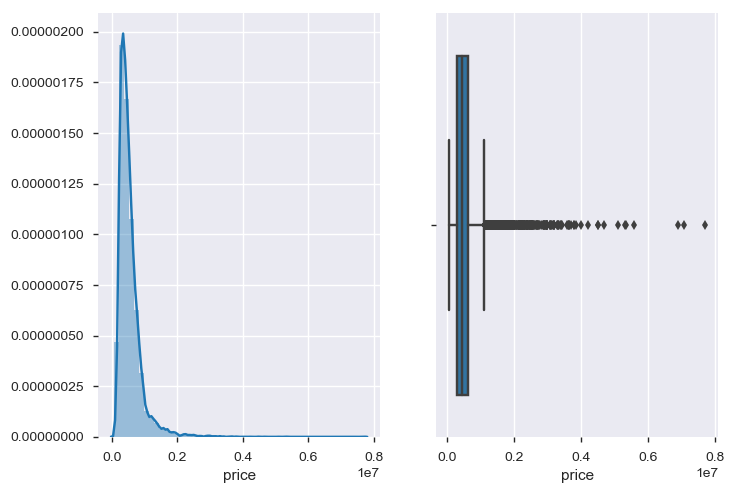

In [10]:
plt.figure()
plt.subplot(1,2,1)
sns.distplot(df1["price"])
plt.subplot(1,2,2)
sns.boxplot(df1["price"])

In [11]:
q1 = df1["price"].quantile(0.25)
q3 = df1["price"].quantile(0.75)
iqr = q3 - q1
df1 = df1[((df1["price"] > (q1 - 1.5 * iqr)) &(df1["price"] < (q3 + 1.5 * iqr)))]
df1.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  221900.0         3       1.00         1180      5650     1.0          3   
1  538000.0         3       2.25         2570      7242     2.0          3   
2  180000.0         2       1.00          770     10000     1.0          3   
3  604000.0         4       3.00         1960      5000     1.0          5   
4  510000.0         3       2.00         1680      8080     1.0          3   

   grade  sqft_above  sqft_basement  yr_built  
0      7        1180              0      1955  
1      7        2170            400      1951  
2      6         770              0      1933  
3      7        1050            910      1965  
4      8        1680              0      1987

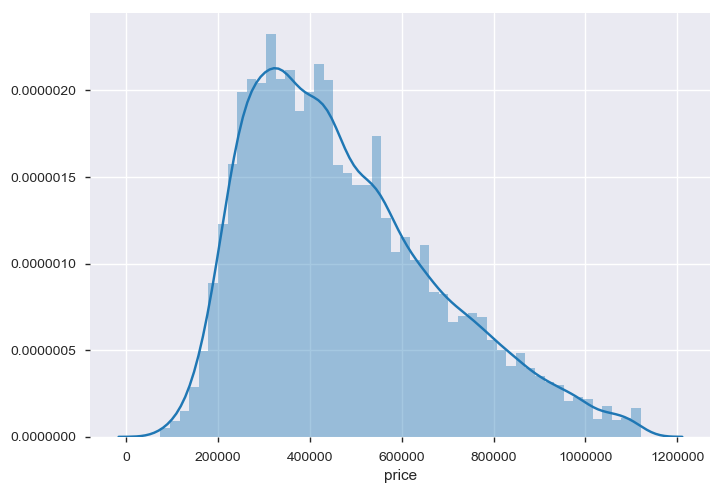

In [12]:
sns.distplot(df1["price"])

In [13]:
df1.shape

(20454, 11)

In [14]:
df1.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  , 3.5 ,
       0.75, 4.25, 0.  , 1.25, 4.5 , 3.75, 4.75, 5.  , 0.5 , 6.75, 5.25,
       7.5 , 5.5 , 5.75, 6.  ])

In [15]:
df1.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  0,  7,  8,  9, 11, 10, 33], dtype=int64)

In [16]:
df1.floors.unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [17]:
df1.condition.unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [18]:
df1.grade.unique()

array([ 7,  6,  8,  9,  5, 10, 11,  4, 12,  3,  1], dtype=int64)

In [19]:
# we need to delete the business function area in order to get more accuracy
display(df1[df1["bathrooms"]== 0],df1[df1["bathrooms"]==0.5])

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
875    1100000.0         0        0.0         3064      4764     3.5   
1149     75000.0         1        0.0          670     43377     1.0   
3119    380000.0         0        0.0         1470       979     3.0   
5832    280000.0         1        0.0          600     24501     1.0   
9773    355000.0         0        0.0         2460      8049     2.0   
9854    235000.0         0        0.0         1470      4800     2.0   
10481   484000.0         1        0.0          690     23244     1.0   
14423   139950.0         0        0.0          844      4269     1.0   
19452   142000.0         0        0.0          290     20875     1.0   

       condition  grade  sqft_above  sqft_basement  yr_built  
875            3      7        3064              0      1990  
1149           3      3         670              0      1966  
3119           3      8        1470              0      2006  
5832           2      3         600              0      1950  
9773           3      8        2460              0      1990  
9854           3      7        1470              0      1996  
10481          4      7         690              0      1948  
14423          4      7         844              0      1913  
19452          1      1         290              0      1963

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
2261   273000.0         2        0.5         1180      7750     1.0   
10424  109000.0         2        0.5          580      6900     1.0   
11674  255000.0         1        0.5          880      1642     1.0   
12041  312500.0         4        0.5         2300      5570     2.0   

       condition  grade  sqft_above  sqft_basement  yr_built  
2261           4      6         590            590      1945  
10424          3      5         580              0      1941  
11674          3      6         500            380      1910  
12041          3      8        2300              0      1996

In [20]:
df1=df1[df1["bathrooms"]>0.5]
df1.shape

(20441, 11)

In [21]:
# we also need to delete the unreasonable number of bedrooms
df1=df1[df1["bedrooms"]<33]
df1=df1[df1["bedrooms"]>0]
df1.shape

(20434, 11)

In [22]:
display(df1["yr_built"].min(),df1["yr_built"].max())

1900

2015

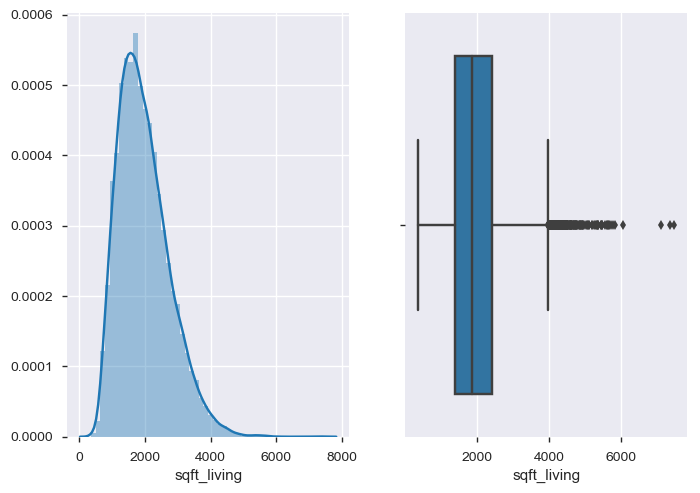

In [23]:
plt.figure()
plt.subplot(1,2,1)
sns.distplot(df1["sqft_living"])
plt.subplot(1,2,2)
sns.boxplot(df1["sqft_living"])

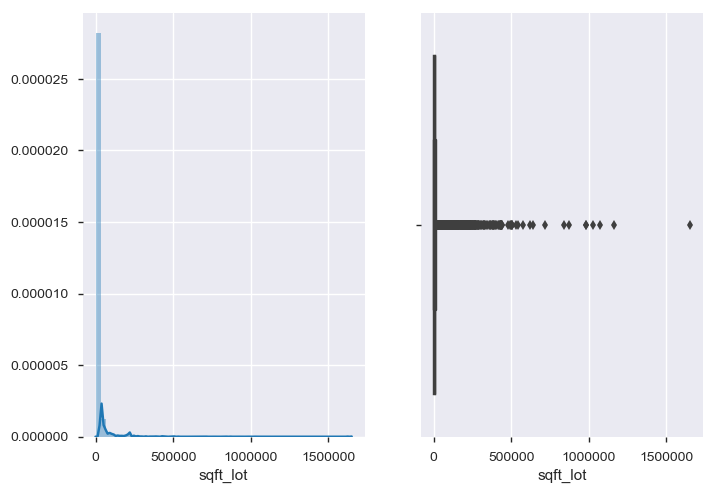

In [24]:
plt.figure()
plt.subplot(1,2,1)
sns.distplot(df1["sqft_lot"])
plt.subplot(1,2,2)
sns.boxplot(df1["sqft_lot"])

In [25]:
q1 = df1["sqft_living"].quantile(0.25)
q3 = df1["sqft_living"].quantile(0.75)
iqr = q3 - q1
df1 = df1[((df1["sqft_living"] > (q1 - 1.5 * iqr)) &(df1["sqft_living"] < (q3 + 1.5 * iqr)))]
df1.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  221900.0         3       1.00         1180      5650     1.0          3   
1  538000.0         3       2.25         2570      7242     2.0          3   
2  180000.0         2       1.00          770     10000     1.0          3   
3  604000.0         4       3.00         1960      5000     1.0          5   
4  510000.0         3       2.00         1680      8080     1.0          3   

   grade  sqft_above  sqft_basement  yr_built  
0      7        1180              0      1955  
1      7        2170            400      1951  
2      6         770              0      1933  
3      7        1050            910      1965  
4      8        1680              0      1987

In [26]:
q1 = df1["sqft_lot"].quantile(0.25)
q3 = df1["sqft_lot"].quantile(0.75)
iqr = q3 - q1
df1 = df1[((df1["sqft_lot"] > (q1 - 1.5 * iqr)) &(df1["sqft_lot"] < (q3 + 1.5 * iqr)))]
df1.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  221900.0         3       1.00         1180      5650     1.0          3   
1  538000.0         3       2.25         2570      7242     2.0          3   
2  180000.0         2       1.00          770     10000     1.0          3   
3  604000.0         4       3.00         1960      5000     1.0          5   
4  510000.0         3       2.00         1680      8080     1.0          3   

   grade  sqft_above  sqft_basement  yr_built  
0      7        1180              0      1955  
1      7        2170            400      1951  
2      6         770              0      1933  
3      7        1050            910      1965  
4      8        1680              0      1987

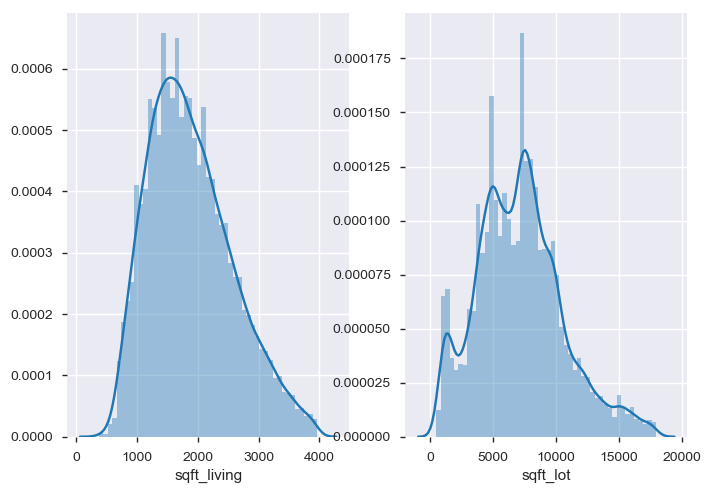

In [27]:
plt.figure()
plt.subplot(1,2,1)
sns.distplot(df1["sqft_living"])
plt.subplot(1,2,2)
sns.distplot(df1["sqft_lot"])

In [28]:
# check the integration between attributes
correlated_features = set()
correlation_matrix = df1.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [29]:
len(correlated_features)

1

In [30]:
print(correlated_features)


{'sqft_above'}


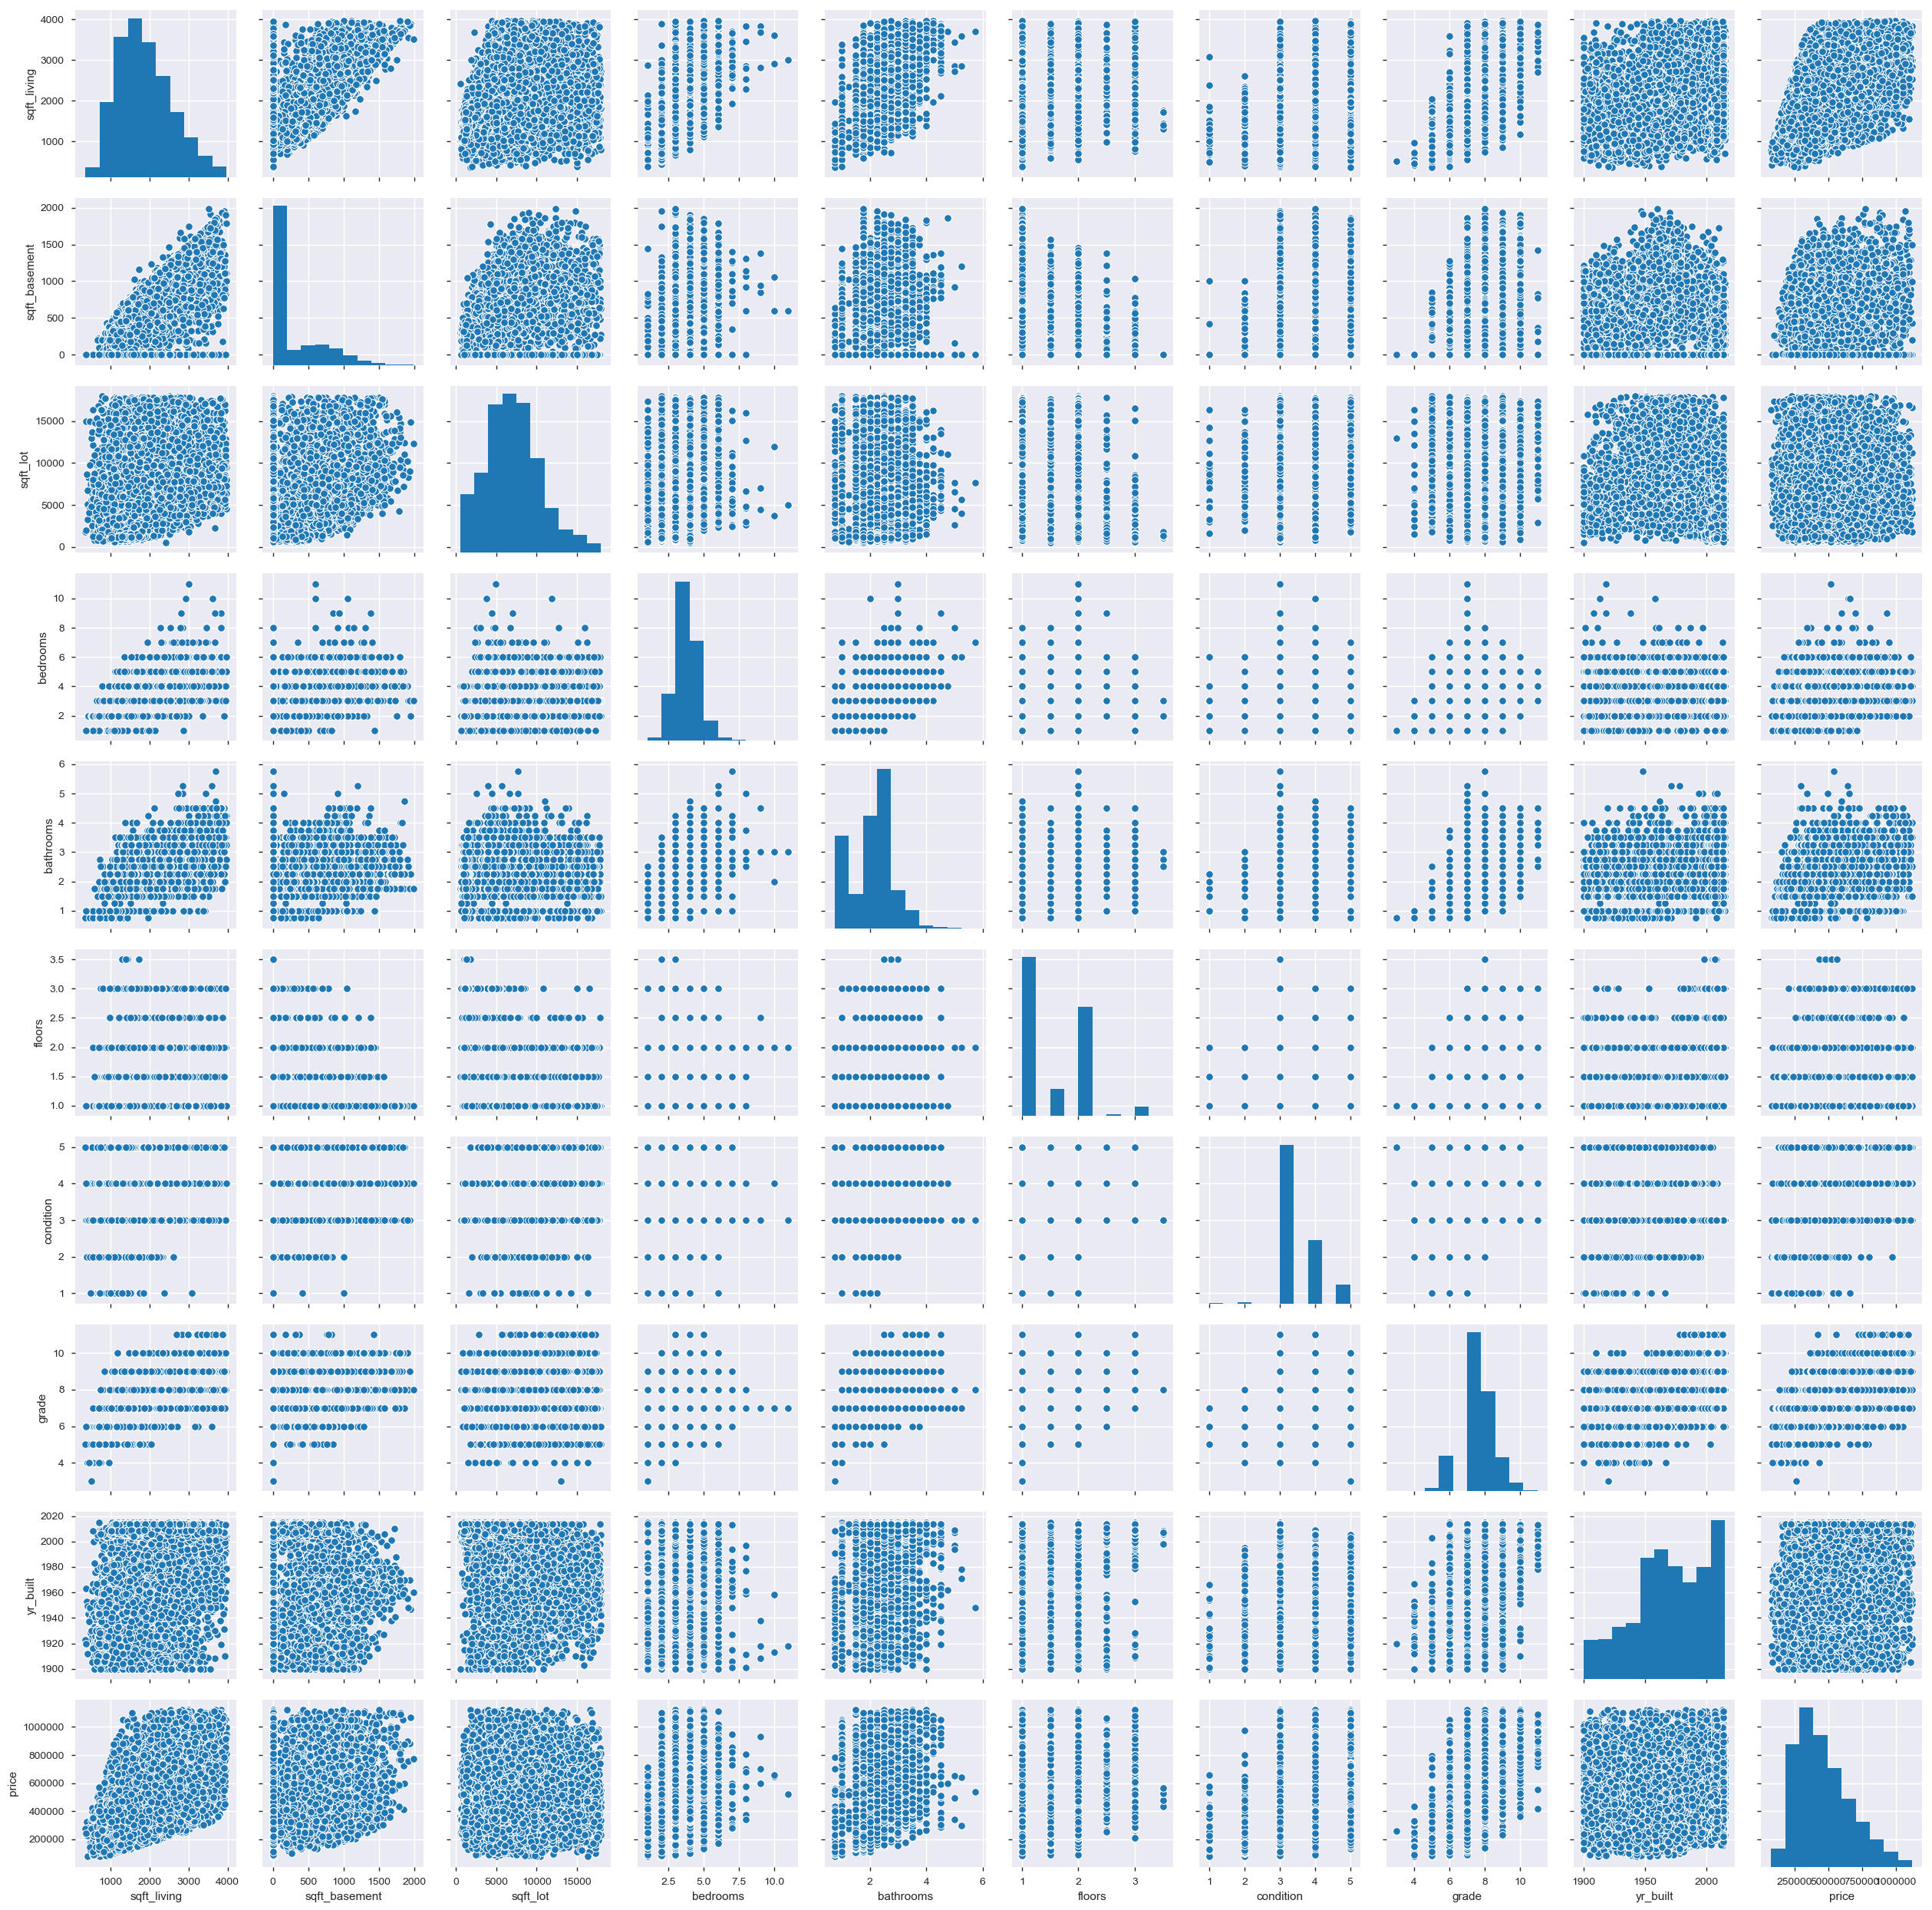

In [31]:
cols = ['sqft_living',"sqft_basement" ,"sqft_lot",'bedrooms', 'bathrooms', 'floors', "condition","grade","yr_built",'price']
sns.pairplot(df1[cols]);

In [32]:
cm = np.corrcoef(df1[cols].values.T)
cm

array([[ 1.        ,  0.36885184,  0.2137952 ,  0.62045236,  0.70112214,
         0.33092465, -0.06533882,  0.67027827,  0.33877842,  0.58305982],
       [ 0.36885184,  1.        ,  0.10295975,  0.28263535,  0.20312092,
        -0.31568723,  0.19271124,  0.05318321, -0.17902705,  0.24499992],
       [ 0.2137952 ,  0.10295975,  1.        ,  0.19904182, -0.02835459,
        -0.36097967,  0.1276656 ,  0.05083853, -0.048221  , -0.0217148 ],
       [ 0.62045236,  0.28263535,  0.19904182,  1.        ,  0.49117356,
         0.14715305,  0.0236251 ,  0.31325504,  0.15929668,  0.27746902],
       [ 0.70112214,  0.20312092, -0.02835459,  0.49117356,  1.        ,
         0.51090158, -0.14066911,  0.59233897,  0.54705123,  0.4098509 ],
       [ 0.33092465, -0.31568723, -0.36097967,  0.14715305,  0.51090158,
         1.        , -0.28495567,  0.46401532,  0.51825836,  0.25286883],
       [-0.06533882,  0.19271124,  0.1276656 ,  0.0236251 , -0.14066911,
        -0.28495567,  1.        , -0.17379433

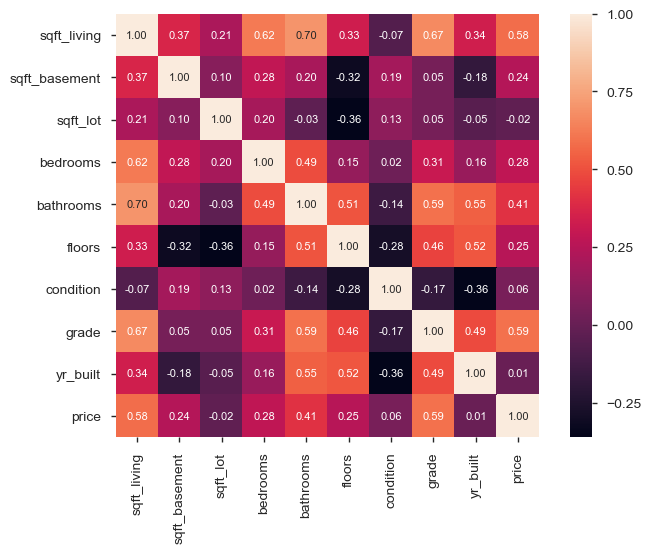

In [33]:
sns.heatmap(cm,cbar=True, annot=True,square=True,
                 fmt='.2f',annot_kws={'size': 8},
                 yticklabels=cols,xticklabels=cols);

In [34]:
df1.drop(columns=["sqft_above"]).head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  221900.0         3       1.00         1180      5650     1.0          3   
1  538000.0         3       2.25         2570      7242     2.0          3   
2  180000.0         2       1.00          770     10000     1.0          3   
3  604000.0         4       3.00         1960      5000     1.0          5   
4  510000.0         3       2.00         1680      8080     1.0          3   

   grade  sqft_basement  yr_built  
0      7              0      1955  
1      7            400      1951  
2      6              0      1933  
3      7            910      1965  
4      8              0      1987

(array([ 231., 1789., 3329., 3771., 3213., 2397., 1542.,  951.,  519.,
         255.]),
 array([ 370.,  730., 1090., 1450., 1810., 2170., 2530., 2890., 3250.,
        3610., 3970.]),
 <a list of 10 Patch objects>)

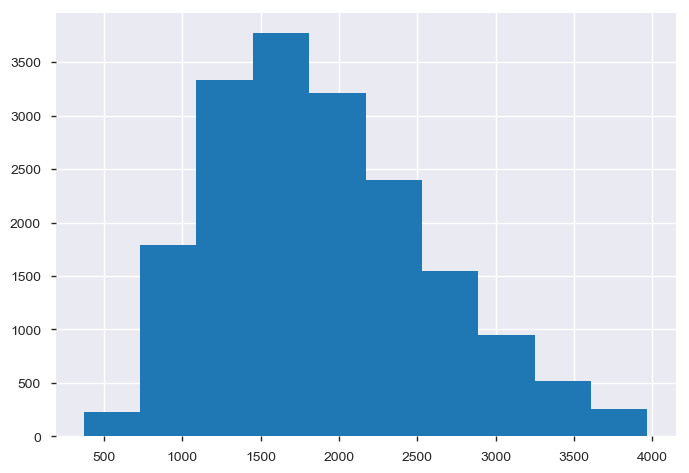

In [35]:
plt.hist(df1["sqft_living"])
# we can know that most of the sqft_living focus on the 1000-2500.

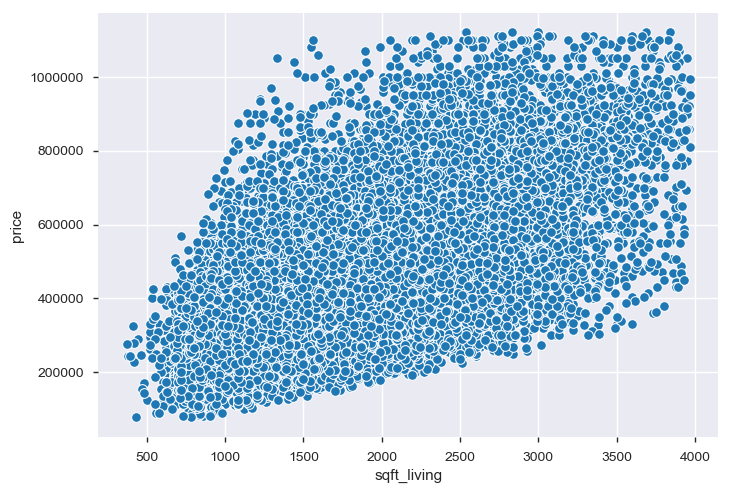

In [36]:
sns.scatterplot(x="sqft_living",y="price",data=df1)
# the relationship between the sqft_living and the price of the house is positive.

In [37]:
df1.loc[df1["sqft_basement"]>0,"sqft_basement"]=1
df1["sqft_basement"].unique()

array([0, 1], dtype=int64)

([<matplotlib.patches.Wedge at 0x2b4f8482e10>,
 [Text(0.39489483799625713, -1.0266733009696463, 'basement_no'),
  Text(-0.39489483799625613, 1.0266733009696467, 'basement_yes')],
 [Text(0.2153971843615948, -0.5600036187107161, '61.69%'),
  Text(-0.21539718436159422, 0.5600036187107164, '38.31%')])

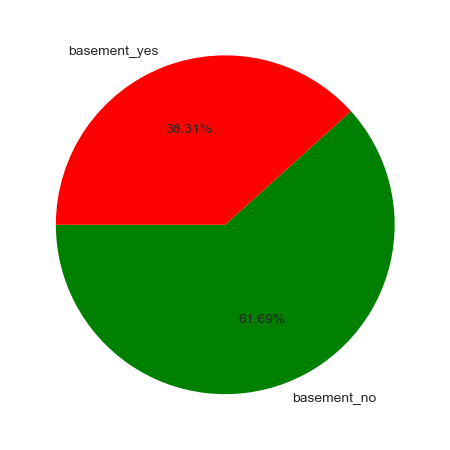

In [38]:
basement = (sum(df1["sqft_basement"]==0),sum(df1["sqft_basement"]==1))
labels = ["basement_no","basement_yes"]
color = ["green","red"]
plt.pie(basement,labels=labels,colors=color,autopct='%.2f%%',startangle=180)

# we can get that the information that most of the houses do not include basement.

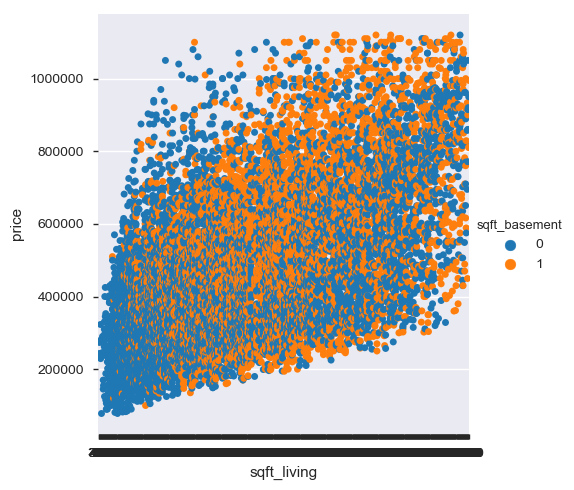

In [39]:
sns.catplot(x="sqft_living",y="price",hue="sqft_basement",data=df1)

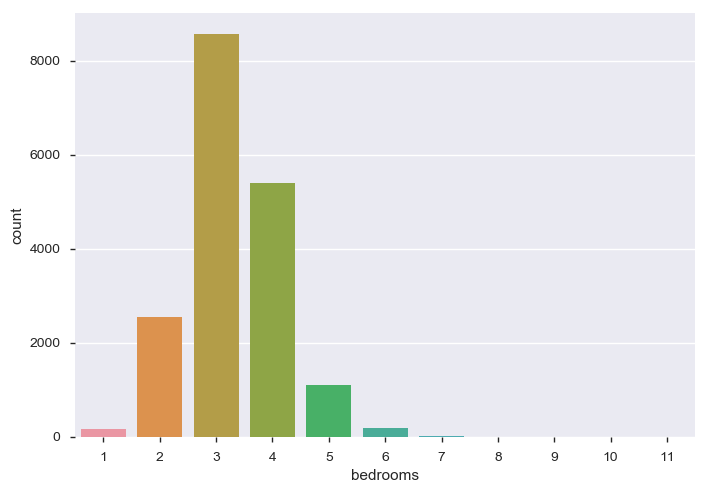

In [40]:
sns.countplot(df1["bedrooms"])

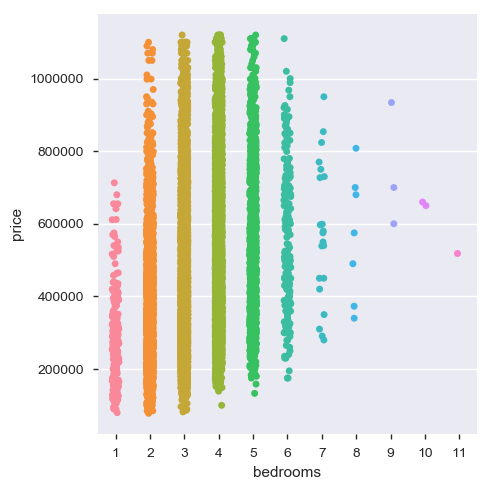

In [41]:
sns.catplot(x="bedrooms", y="price",data=df1)
# generally for the basic house, the more bedrooms the higher price.

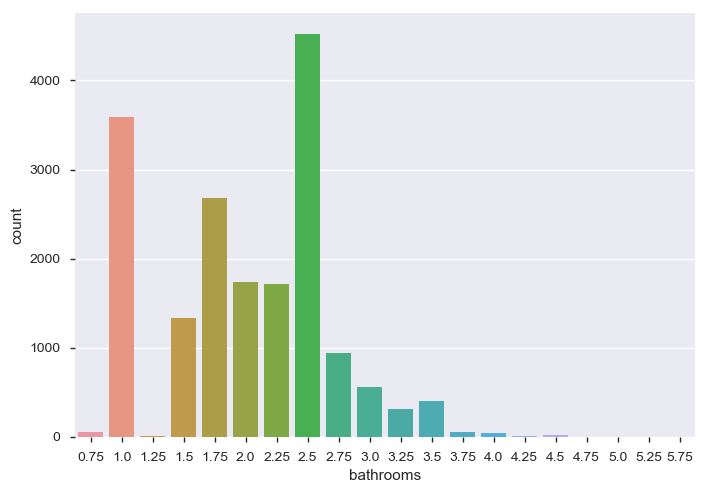

In [42]:
sns.countplot(df1["bathrooms"])

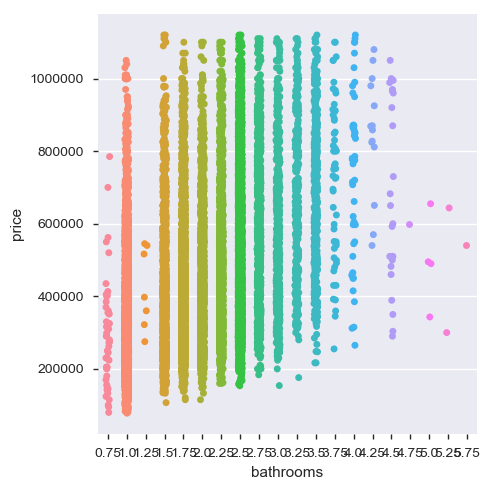

In [43]:
sns.catplot(x="bathrooms", y="price", data=df1)
# the trend is same to the bedrooms.

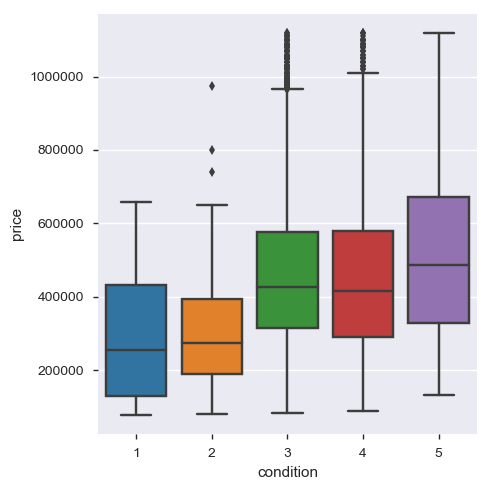

In [44]:
sns.catplot(x="condition", y="price",kind="box",data=df1)

(array([1.000e+00, 2.000e+01, 1.960e+02, 1.864e+03, 0.000e+00, 8.345e+03,
        5.269e+03, 1.804e+03, 4.550e+02, 4.300e+01]),
 array([ 3. ,  3.8,  4.6,  5.4,  6.2,  7. ,  7.8,  8.6,  9.4, 10.2, 11. ]),
 <a list of 10 Patch objects>)

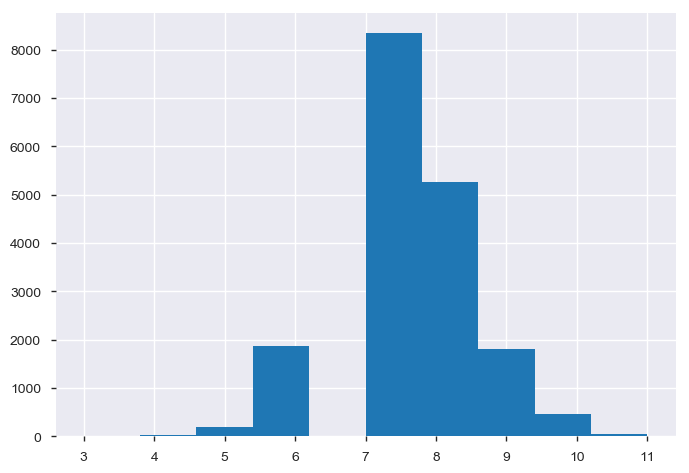

In [45]:
df1["grade"].unique()
plt.hist(df1["grade"])

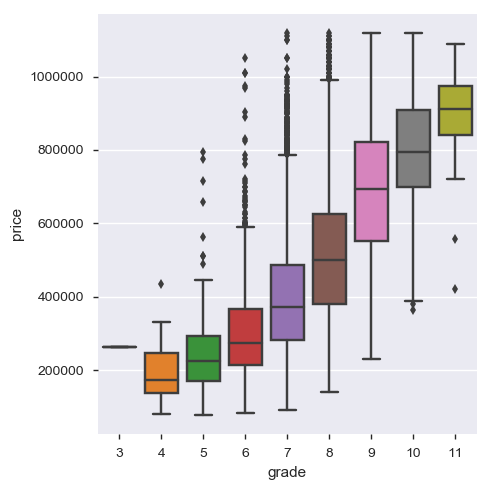

In [46]:
sns.catplot(x="grade", y="price",kind="box",data=df1)
# higher grade, higher price

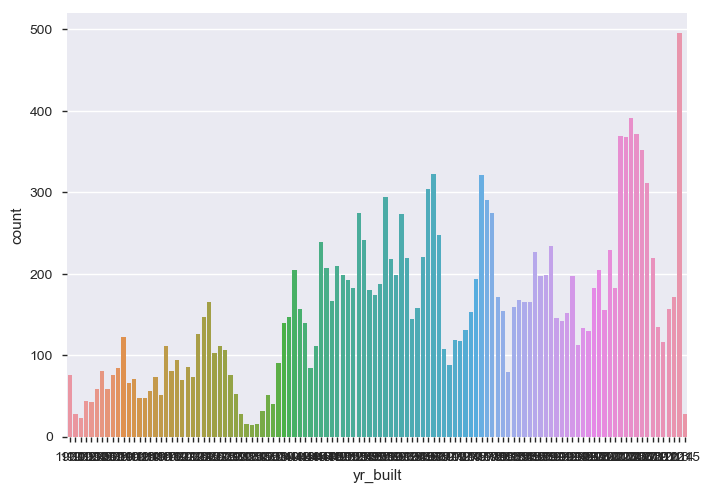

In [47]:
sns.countplot(df1["yr_built"])

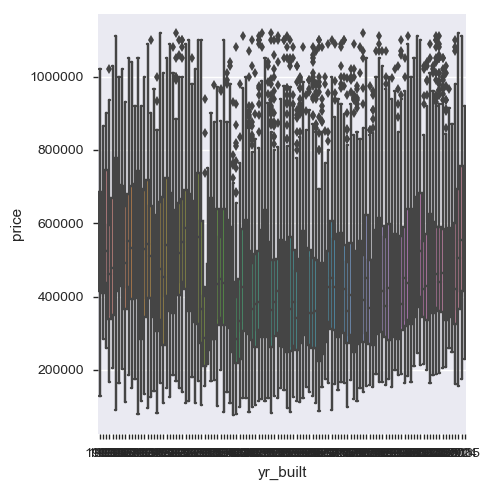

In [48]:
sns.catplot(x="yr_built", y="price",kind="box",data=df1)
# we can know that the highest price of the house focus on the old house and modern house
# the old house has less sales with high price. the reason that the middle age house has saled a lot is the lower price. people preper modern
# house, they prefer use higher price to buy that.

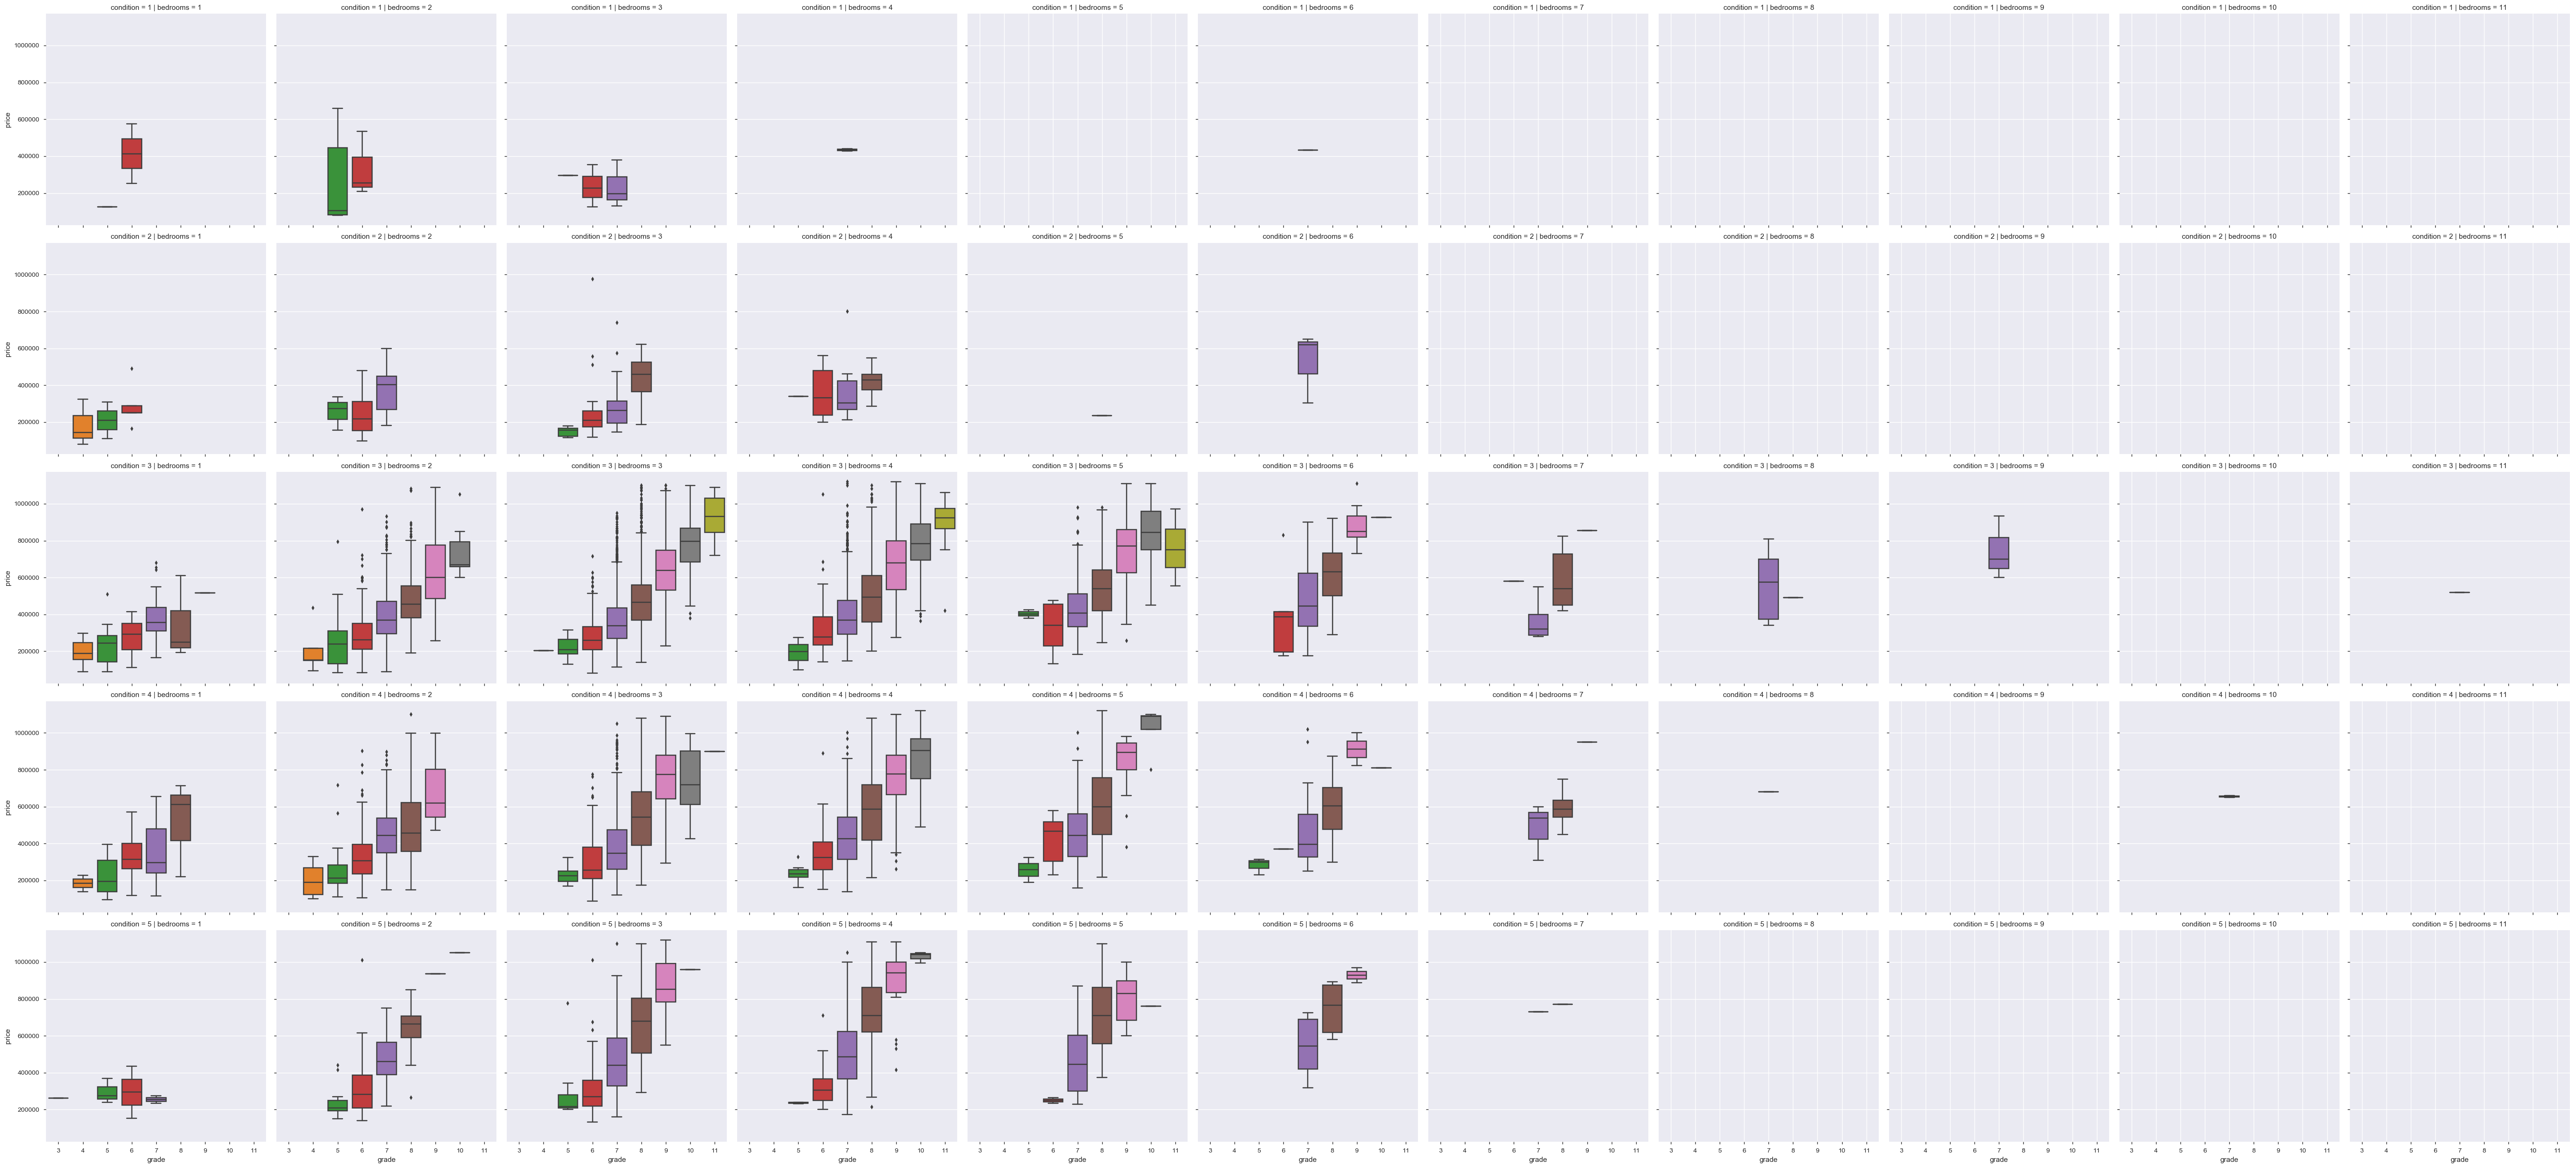

In [49]:
sns.catplot(x="grade", y="price", row="condition", 
            kind="box",
                 col="bedrooms", data=df1);

In [50]:
df1.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  221900.0         3       1.00         1180      5650     1.0          3   
1  538000.0         3       2.25         2570      7242     2.0          3   
2  180000.0         2       1.00          770     10000     1.0          3   
3  604000.0         4       3.00         1960      5000     1.0          5   
4  510000.0         3       2.00         1680      8080     1.0          3   

   grade  sqft_above  sqft_basement  yr_built  
0      7        1180              0      1955  
1      7        2170              1      1951  
2      6         770              0      1933  
3      7        1050              1      1965  
4      8        1680              0      1987

In [51]:
features_data = df1.iloc[:,1::]
features_data.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  grade  \
0         3       1.00         1180      5650     1.0          3      7   
1         3       2.25         2570      7242     2.0          3      7   
2         2       1.00          770     10000     1.0          3      6   
3         4       3.00         1960      5000     1.0          5      7   
4         3       2.00         1680      8080     1.0          3      8   

   sqft_above  sqft_basement  yr_built  
0        1180              0      1955  
1        2170              1      1951  
2         770              0      1933  
3        1050              1      1965  
4        1680              0      1987

In [52]:
target_data = df1.iloc[:,0]
target_data.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [53]:
df1.shape[0]

17997

In [54]:
# split the date into training dateset and test dataset
X_train, X_test, y_train, y_test = train_test_split(
    features_data, target_data, test_size=0.30, random_state=0)

In [55]:
# scaling the data using standard 
std = StandardScaler()
std_training = std.fit_transform(X_train)

C:\Users\shuol\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\shuol\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [56]:
std_test = std.fit_transform(X_test)

C:\Users\shuol\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\shuol\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [57]:
# after scaling data, we use the reduction the data  using PCA

In [58]:
pca = PCA(n_components=3)

X_r = pca.fit(std_training).transform(std_training)

X_r.shape

(12597, 3)

In [59]:
principalDf = pd.DataFrame(data = X_r
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
principalDf.head()

principal component 1  principal component 2  principal component 3
0              -0.275548               1.959851              -0.338051
1              -1.834646               0.478782              -0.312045
2               0.503588              -1.769217               0.123496
3              -0.150201              -3.813188               0.854293
4              -1.970085               0.094829              -1.049122

In [60]:
print(pca.explained_variance_ratio_)

[0.41441061 0.17813997 0.11601224]


In [61]:
# using linear regression to preditc the price
lr = LinearRegression()


In [62]:
lr.fit(X_r, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
X_t = pca.fit(std_test).transform(std_test)
y_pred = lr.predict(X_t)

In [64]:
lr.coef_

array([47797.55457334, 34287.37140747, 31479.89711536])

In [65]:
lr.intercept_

463736.1798840994

In [66]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

144452.22539659464
31350666574.136124
177061.19443326967


In [67]:
# select K best
# Select the top three features to use for Linear Regression
selector = SelectKBest(f_regression, k=3)
selector.fit(features_data, target_data)

SelectKBest(k=3, score_func=<function f_regression at 0x000002B4EF2BDF28>)

In [68]:
selector.get_support()

array([False, False,  True, False, False, False,  True,  True, False,
       False])

In [69]:
print(features_data.columns.values[selector.get_support()])

['sqft_living' 'grade' 'sqft_above']


In [70]:
# linear regression for the price predicting
X = std_training[:, selector.get_support()]
print(X.shape)

(12597, 3)


In [71]:
test=std_test[:, selector.get_support()]

In [72]:
lr = LinearRegression(normalize=True);

In [73]:
lr.fit(X, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [74]:
y_pred = lr.predict(test)

In [75]:
lr.coef_

array([ 96050.42177152,  82028.54356908, -41854.99138998])

In [76]:
lr.intercept_

463736.1798840994

In [77]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

120310.90888647347
22884874823.109734
151277.47625839655


In [78]:
# even though the linear regression is not good at predict the price of the house. but the Kbest is better than PCA

In [79]:
df1.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  221900.0         3       1.00         1180      5650     1.0          3   
1  538000.0         3       2.25         2570      7242     2.0          3   
2  180000.0         2       1.00          770     10000     1.0          3   
3  604000.0         4       3.00         1960      5000     1.0          5   
4  510000.0         3       2.00         1680      8080     1.0          3   

   grade  sqft_above  sqft_basement  yr_built  
0      7        1180              0      1955  
1      7        2170              1      1951  
2      6         770              0      1933  
3      7        1050              1      1965  
4      8        1680              0      1987

In [80]:
display(df1.price.min(),df1.price.max())

78000.0

1120000.0

In [132]:
df1['housetype'] = (df1['price'] >=500000).astype(int)

In [133]:
df1.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  221900.0         3       1.00         1180      5650     1.0          3   
1  538000.0         3       2.25         2570      7242     2.0          3   
2  180000.0         2       1.00          770     10000     1.0          3   
3  604000.0         4       3.00         1960      5000     1.0          5   
4  510000.0         3       2.00         1680      8080     1.0          3   

   grade  sqft_above  sqft_basement  yr_built  housetype  
0      7        1180              0      1955          0  
1      7        2170              1      1951          1  
2      6         770              0      1933          0  
3      7        1050              1      1965          1  
4      8        1680              0      1987          1

In [134]:
df1.housetype.unique()

array([0, 1], dtype=int64)

In [135]:
df1.housetype.count()

17997

In [136]:
df1[df1["housetype"]==1].housetype.count()

6614

In [141]:
df2=df1
df2.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  221900.0         3       1.00         1180      5650     1.0          3   
1  538000.0         3       2.25         2570      7242     2.0          3   
2  180000.0         2       1.00          770     10000     1.0          3   
3  604000.0         4       3.00         1960      5000     1.0          5   
4  510000.0         3       2.00         1680      8080     1.0          3   

   grade  sqft_above  sqft_basement  yr_built  housetype  
0      7        1180              0      1955          0  
1      7        2170              1      1951          1  
2      6         770              0      1933          0  
3      7        1050              1      1965          1  
4      8        1680              0      1987          1

In [142]:
df2=df2.drop(columns=["price"])
df2.head()


bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  grade  \
0         3       1.00         1180      5650     1.0          3      7   
1         3       2.25         2570      7242     2.0          3      7   
2         2       1.00          770     10000     1.0          3      6   
3         4       3.00         1960      5000     1.0          5      7   
4         3       2.00         1680      8080     1.0          3      8   

   sqft_above  sqft_basement  yr_built  housetype  
0        1180              0      1955          0  
1        2170              1      1951          1  
2         770              0      1933          0  
3        1050              1      1965          1  
4        1680              0      1987          1

In [143]:
X=df2.iloc[:,0:11]
y=df2.iloc[:,-1]

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [151]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [152]:

models={}
models["lr"]=LogisticRegression()
models["rf"] = RandomForestClassifier(n_estimators=10, random_state=1)
models["GN"] = GaussianNB()

In [154]:
clf = LogisticRegression().fit(X_train, y_train)
clf.score(X_test, y_test)

C:\Users\shuol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9998148148148148

In [157]:
probs = clf.predict_proba(X_test)
probs[:9]

array([[1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ]])

In [158]:
pred = clf.predict(X_test)
pred[:5]

array([0, 1, 1, 0, 1])

In [159]:
metrics.confusion_matrix(y_test, pred)

array([[3418,    0],
       [   0, 1982]], dtype=int64)

In [155]:
clf = RandomForestClassifier().fit(X_train, y_train)
clf.score(X_test, y_test)

C:\Users\shuol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.0

In [147]:
df2[df2["housetype"]==0].housetype.count()

11383

In [149]:
results = []
for key in models:
    cv_result = cross_val_score(models[key],X_train, y_train,cv=3)
    results.append(cv_result)
    print("%s: %f (%f)" % (key,cv_result.mean(),cv_result.std()))

C:\Users\shuol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shuol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shuol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


lr: 0.999762 (0.000000)
rf: 1.000000 (0.000000)
GN: 1.000000 (0.000000)


In [148]:
results = []
for key in models:
    kfold = KFold(50,random_state=1)
    cv_result = cross_val_score(models[key],X_train, y_train,cv=kfold)
    results.append(cv_result)
    print("%s: %f (%f)" % (key,cv_result.mean(),cv_result.std()))



C:\Users\shuol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shuol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shuol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shuol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shuol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\shuol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shuol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shuol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shuol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shuol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

lr: 0.999921 (0.000556)
rf: 1.000000 (0.000000)
GN: 1.000000 (0.000000)
